In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
NUM_BINS = 10  # n: for [0-n]
TITLE = "Discrete math II Midterm" # set a title
FIG_SIZE = (12, 7) # adjust figure size

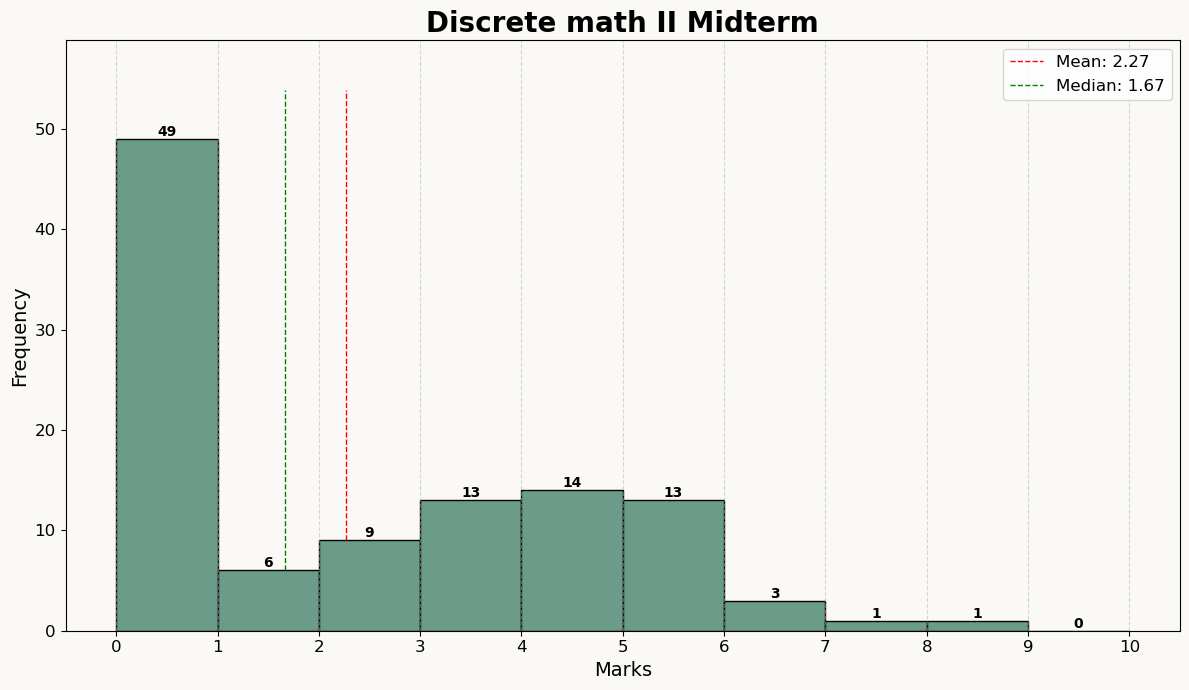

Quartiles:
0.25    0.00
0.50    1.67
0.75    4.05
dtype: float64


In [138]:
# Load and process data
marks = []
with open('simple_data.txt', 'r') as file:
    for line in file:
        marks.append(float(line.strip().replace(',', '.')))

marks = [x for x in marks if x >= 0 and x < NUM_BINS]
marks_series = pd.Series(marks)

# Calculate statistics
mean = marks_series.mean()
median = marks_series.median()
mode = marks_series.mode().iloc[0] if not marks_series.mode().empty else None
std_dev = marks_series.std()
quartiles = marks_series.quantile([0.25, 0.5, 0.75])
TITLE = TITLE

# Create the plot
fig, ax = plt.subplots(figsize=FIG_SIZE)

# Set the background color 
fig.patch.set_facecolor('#FAF9F6')
ax.set_facecolor('#FAF9F6')

# Plot histogram
n, bins, patches = ax.hist(marks_series, bins=range(NUM_BINS + 1), edgecolor='black', alpha=1, color="#6A9C89")

# Customize the plot
ax.set_title(TITLE, fontsize=20, fontweight='bold')
ax.set_xlabel('Marks', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add labels for bins
for i in range(len(n)):
    # Add frequency label
    ax.text((bins[i] + bins[i+1])/2, n[i], int(n[i]), 
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Get the maximum height of the histogram
max_height = max(n)

# Add a line for the mean above the histogram
mean_bin = int(mean)
mean_height = n[mean_bin] if mean_bin < len(n) else 0
ax.plot([mean, mean], [mean_height, max_height * 1.1], color='red', linestyle='--', linewidth=1, label=f'Mean: {mean:.2f}')

# Add a line for the median above the histogram
median_bin = int(median)
median_height = n[median_bin] if median_bin < len(n) else 0
ax.plot([median, median], [median_height, max_height * 1.1], color='green', linestyle='--', linewidth=1, label=f'Median: {median:.2f}')

# Customize the legend
ax.legend(loc='upper right', fontsize=12)

# Set x-axis ticks for each integer from 0 to NUM_BINS-1
ax.set_xticks(range(NUM_BINS+1))
ax.set_xticklabels(range(NUM_BINS+1))

# Add grid lines for x-axis
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust y-axis to accommodate the lines
ax.set_ylim(0, max_height * 1.2)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Quartiles:\n{quartiles}")